In [1]:
import pandas as pd
import torch
import os
import sys
from torch.utils.data import DataLoader
import time
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from dataset_PAMAP2 import dataset_PAMAP2

In [2]:
no_id_list=[108,109]
dataset=dataset_PAMAP2(no_id_list)

In [3]:
#import importlib
#import dataset_PAMAP2
#importlib.reload(dataset_PAMAP2)

In [61]:
import matplotlib.pyplot as plt
import numpy as np
def plot_accuracies(results,stepsize,labels_name):
    res=results
    fig=plt.figure(figsize=(10, 6))
    ax=plt.subplot(polar=True)
    
    ax.set_ylim(0.4,1)
    ax.set_yticks(np.arange(0.5,1,0.1))
    
    id_tests=[101,102,103,104,105,106,107]
    angles=[i*360/len(id_tests) for i in range(len(id_tests))]
    lines, labels = plt.thetagrids(angles, (id_tests))
    for i in res:
        i.append(i[0]) 
        theta = np.linspace(0, 2 * np.pi, len(i))
        plt.plot(theta, i)

    #plt.fill(theta, actual, 'b', alpha=0.1)
    plt.legend(labels=labels_name,bbox_to_anchor=(0.5, -0.25),loc=8)
    
    plt.title("Step = "+str(stepsize))
    plt.show(fig)
    fig.savefig("All_activities_Step_"+str(stepsize)+".png")
    plt.close(fig) 

In [5]:
#activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
#id_test=103
#batch_size=64
#stepsize=32
#window_size=256
#train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,window_size,stepsize,batch_size)

# Apprentissage

In [6]:
import models
import importlib
importlib.reload(models)
import pytorch_lightning as pl 
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [7]:
def train_model(model, clipping, num_epochs, data_loader_train, data_loader_val, data_loader_test):

    early_stop_callback = EarlyStopping(
      monitor='valid_accuracy',
      min_delta=0.00,
      patience=15,
      verbose=False,
      mode='max'
    )
    trainer = Trainer(max_epochs=num_epochs, gradient_clip_val= clipping, progress_bar_refresh_rate = 40, gpus=1, callbacks=[early_stop_callback])
    trainer.fit(model, data_loader_train, data_loader_val)
    final_results = trainer.logged_metrics
    final_results["test"] = trainer.test(model, data_loader_test)[0]
    final_results["num_epochs"] = trainer.current_epoch
    final_results["num_parameters"] = model.num_paramaters
    return final_results

In [8]:
#model = models.MultiChannelBase(40, [5,5], 256, len(activity_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
#res=train_model(model, 1, 50, train_data,test_data,test_data)

In [9]:
#window_sizes=[256,128,64]
#kernel_sizes=[[3,3,3],[3,3],[3]]
#model = models.MultiChannelMultiTime(40,window_sizes, kernel_sizes, len(activity_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
#res=train_model(model, 1, 50, train_data,test_data,test_data)

In [10]:
#window_sizes=[256,128,64]
#kernel_sizes=[3]
#down_sampling_kernel=[[3,3],[3],[]]
#model = models.MultiChannelMultiTimeDownSample(40,window_sizes,down_sampling_kernel, kernel_sizes,64, len(activity_list), lr = 0.0001, betas = (0.9, 0.999), eps = 1e-8)
#res=train_model(model, 1, 50, train_data,test_data,test_data)

# Comparaison des modèles

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7133264541625977,
 'test_accuracy_epoch': 0.7133264541625977,
 'test_batch_time': 0.0049800872802734375,
 'test_batch_time_epoch': 0.004351237788796425,
 'test_loss': 5.243699550628662,
 'test_loss_epoch': 6.509344100952148}
--------------------------------------------------------------------------------
Base stepsize :  128  id_test :  101  Test Accuracy :  0.7133264541625977


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.649276852607727,
 'test_accuracy_epoch': 0.649276852607727,
 'test_batch_time': 0.005983829498291016,
 'test_batch_time_epoch': 0.005924914497882128,
 'test_loss': 2.0490078926086426,
 'test_loss_epoch': 2.462700843811035}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  128  id_test :  101  Test Accuracy :  0.649276852607727


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6549586653709412,
 'test_accuracy_epoch': 0.6549586653709412,
 'test_batch_time': 0.004986286163330078,
 'test_batch_time_epoch': 0.004887246061116457,
 'test_loss': 1.3025962114334106,
 'test_loss_epoch': 1.247996211051941}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  101  Test Accuracy :  0.6549586653709412


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7411764860153198,
 'test_accuracy_epoch': 0.7411764860153198,
 'test_batch_time': 0.003996849060058594,
 'test_batch_time_epoch': 0.004874805454164743,
 'test_loss': 3.3647708892822266,
 'test_loss_epoch': 2.8770761489868164}
--------------------------------------------------------------------------------
Base stepsize :  128  id_test :  102  Test Accuracy :  0.7411764860153198


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8632352948188782,
 'test_accuracy_epoch': 0.8632352948188782,
 'test_batch_time': 0.004961729049682617,
 'test_batch_time_epoch': 0.007140587083995342,
 'test_loss': 0.4942183196544647,
 'test_loss_epoch': 0.5943286418914795}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  128  id_test :  102  Test Accuracy :  0.8632352948188782


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.873039186000824,
 'test_accuracy_epoch': 0.873039186000824,
 'test_batch_time': 0.00498652458190918,
 'test_batch_time_epoch': 0.005106822121888399,
 'test_loss': 0.37811702489852905,
 'test_loss_epoch': 0.5103644728660583}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  102  Test Accuracy :  0.873039186000824


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8918518424034119,
 'test_accuracy_epoch': 0.8918518424034119,
 'test_batch_time': 0.003989219665527344,
 'test_batch_time_epoch': 0.004601956345140934,
 'test_loss': 0.00024905105237849057,
 'test_loss_epoch': 0.578953742980957}
--------------------------------------------------------------------------------
Base stepsize :  128  id_test :  103  Test Accuracy :  0.8918518424034119


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8399999737739563,
 'test_accuracy_epoch': 0.8399999737739563,
 'test_batch_time': 0.004987001419067383,
 'test_batch_time_epoch': 0.005462329834699631,
 'test_loss': 4.198389530181885,
 'test_loss_epoch': 0.6879152059555054}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  128  id_test :  103  Test Accuracy :  0.8399999737739563


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8600000143051147,
 'test_accuracy_epoch': 0.8600000143051147,
 'test_batch_time': 0.0049877166748046875,
 'test_batch_time_epoch': 0.005498026963323355,
 'test_loss': 2.551565170288086,
 'test_loss_epoch': 0.4928636848926544}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  103  Test Accuracy :  0.8600000143051147


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9075208902359009,
 'test_accuracy_epoch': 0.9075208902359009,
 'test_batch_time': 0.00498652458190918,
 'test_batch_time_epoch': 0.004309510346502066,
 'test_loss': 0.04974602535367012,
 'test_loss_epoch': 0.43430113792419434}
--------------------------------------------------------------------------------
Base stepsize :  128  id_test :  104  Test Accuracy :  0.9075208902359009


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9442896842956543,
 'test_accuracy_epoch': 0.9442896842956543,
 'test_batch_time': 0.006011009216308594,
 'test_batch_time_epoch': 0.0063294293358922005,
 'test_loss': 1.1013962030410767,
 'test_loss_epoch': 0.302041232585907}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  128  id_test :  104  Test Accuracy :  0.9442896842956543


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9454038739204407,
 'test_accuracy_epoch': 0.9454038739204407,
 'test_batch_time': 0.004986286163330078,
 'test_batch_time_epoch': 0.004771966487169266,
 'test_loss': 0.6585387587547302,
 'test_loss_epoch': 0.30894967913627625}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  104  Test Accuracy :  0.9454038739204407


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.4656561017036438,
 'test_accuracy_epoch': 0.4656561017036438,
 'test_batch_time': 0.0039942264556884766,
 'test_batch_time_epoch': 0.004352385178208351,
 'test_loss': 3.271498680114746,
 'test_loss_epoch': 3.2580947875976562}
--------------------------------------------------------------------------------
Base stepsize :  128  id_test :  105  Test Accuracy :  0.4656561017036438


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8318332433700562,
 'test_accuracy_epoch': 0.8318332433700562,
 'test_batch_time': 0.00498652458190918,
 'test_batch_time_epoch': 0.0067420946434140205,
 'test_loss': 1.250119686126709,
 'test_loss_epoch': 0.9063140749931335}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  128  id_test :  105  Test Accuracy :  0.8318332433700562


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8223590850830078,
 'test_accuracy_epoch': 0.8223590850830078,
 'test_batch_time': 0.004953622817993164,
 'test_batch_time_epoch': 0.0052643208764493465,
 'test_loss': 0.8285094499588013,
 'test_loss_epoch': 0.6503575444221497}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  105  Test Accuracy :  0.8223590850830078


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8966942429542542,
 'test_accuracy_epoch': 0.8966942429542542,
 'test_batch_time': 0.003989458084106445,
 'test_batch_time_epoch': 0.004348149988800287,
 'test_loss': 2.550215482711792,
 'test_loss_epoch': 0.6935306191444397}
--------------------------------------------------------------------------------
Base stepsize :  128  id_test :  106  Test Accuracy :  0.8966942429542542


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9013429880142212,
 'test_accuracy_epoch': 0.9013429880142212,
 'test_batch_time': 0.005955934524536133,
 'test_batch_time_epoch': 0.00643967604264617,
 'test_loss': 1.5125482082366943,
 'test_loss_epoch': 0.5091809034347534}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  128  id_test :  106  Test Accuracy :  0.9013429880142212


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8873966932296753,
 'test_accuracy_epoch': 0.8873966932296753,
 'test_batch_time': 0.004986286163330078,
 'test_batch_time_epoch': 0.005013587884604931,
 'test_loss': 0.9155586361885071,
 'test_loss_epoch': 0.45723819732666016}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  106  Test Accuracy :  0.8873966932296753


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8423973321914673,
 'test_accuracy_epoch': 0.8423973321914673,
 'test_batch_time': 0.0039958953857421875,
 'test_batch_time_epoch': 0.00418616458773613,
 'test_loss': 0.4397205710411072,
 'test_loss_epoch': 0.9562927484512329}
--------------------------------------------------------------------------------
Base stepsize :  128  id_test :  107  Test Accuracy :  0.8423973321914673


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9334073066711426,
 'test_accuracy_epoch': 0.9334073066711426,
 'test_batch_time': 0.005011081695556641,
 'test_batch_time_epoch': 0.005865455139428377,
 'test_loss': 0.5853150486946106,
 'test_loss_epoch': 0.36121830344200134}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  128  id_test :  107  Test Accuracy :  0.9334073066711426


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9328523874282837,
 'test_accuracy_epoch': 0.9328523874282837,
 'test_batch_time': 0.00498509407043457,
 'test_batch_time_epoch': 0.005005111452192068,
 'test_loss': 0.2735190987586975,
 'test_loss_epoch': 0.2953411638736725}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  107  Test Accuracy :  0.9328523874282837


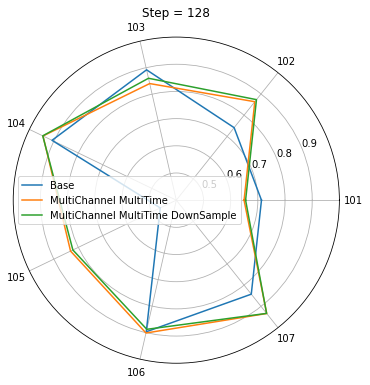

[[0.7133264541625977, 0.7411764860153198, 0.8918518424034119, 0.9075208902359009, 0.4656561017036438, 0.8966942429542542, 0.8423973321914673, 0.7133264541625977], [0.649276852607727, 0.8632352948188782, 0.8399999737739563, 0.9442896842956543, 0.8318332433700562, 0.9013429880142212, 0.9334073066711426, 0.649276852607727], [0.6549586653709412, 0.873039186000824, 0.8600000143051147, 0.9454038739204407, 0.8223590850830078, 0.8873966932296753, 0.9328523874282837, 0.6549586653709412]]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 9.8 K 
4 | classifier | Sequential | 47.5 K
------------------------------------------
57.4 K    Trainable params
0         Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 72.7 K
------------------------------------------
72.7 K    Trainable params
0         Non-trainable params
72.7 K    Total params
0.291     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7121407985687256,
 'test_accuracy_epoch': 0.7121407985687256,
 'test_batch_time': 0.003988981246948242,
 'test_batch_time_epoch': 0.0051156748086214066,
 'test_loss': 8.1178560256958,
 'test_loss_epoch': 8.706807136535645}
--------------------------------------------------------------------------------
Base stepsize :  64  id_test :  101  Test Accuracy :  0.7121407985687256


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\axelc\AppData\Roaming\Python\Python37\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x00000211BFCD1CA8>
Traceback (most recent call last):
  File "C:\Users\axelc\Anaconda3\envs\pytorch\lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "C:\Users\axelc\Anaconda3\envs\pytorch\lib\site-packages\tqdm\notebook.py", line 280, in close
    self.disp(close=True)
AttributeError: 'tqdm' object has no attribute 'disp'
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 71.3 K
------------------------------------------
71.3 K    Trainable params
0         Non-trainable params
71.3 K    Total params
0.285     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7129174470901489,
 'test_accuracy_epoch': 0.7129174470901489,
 'test_batch_time': 0.005013704299926758,
 'test_batch_time_epoch': 0.005985163152217865,
 'test_loss': 1.175089955329895,
 'test_loss_epoch': 2.0712356567382812}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  64  id_test :  101  Test Accuracy :  0.7129174470901489


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6528604626655579,
 'test_accuracy_epoch': 0.6528604626655579,
 'test_batch_time': 0.0050089359283447266,
 'test_batch_time_epoch': 0.005319057032465935,
 'test_loss': 1.4795379638671875,
 'test_loss_epoch': 1.6576231718063354}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  101  Test Accuracy :  0.6528604626655579


KeyboardInterrupt: 

In [17]:
activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
#batch_size=32
batch_sizes={8:256,16:128,32:64,64:32,128:16}


id_tests=[101,102,103,104,105,106,107]
stepsizes=[128,64,32,16,8]
window_size=256
results=[[],[],[]]
for stepsize in stepsizes:
    for id_test in id_tests:
        
        train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,window_size,stepsize,batch_sizes[stepsize])
        
        #modèle de Base
        model1 = models.MultiChannelBase(40, [3,3], 256, len(activity_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model1, 1, 50, train_data,test_data,test_data)
        print("Base stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[0].append(res['test']['test_accuracy'])
        del model1
        torch.cuda.empty_cache()
        
        #modèle MultiChannel MultiTime
        window_sizes=[256,128,64]
        kernel_sizes=[[3,3,3],[3,3],[3]]
        model2 = models.MultiChannelMultiTime(40,window_sizes, kernel_sizes, len(activity_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model2, 1, 50, train_data,test_data,test_data)
        print("MultiChannel MultiTime stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[1].append(res['test']['test_accuracy'])
        del model2
        torch.cuda.empty_cache()
        
        #modèle MultiChannel MultiTime DownSample
        window_sizes=[256,128,64]
        kernel_sizes=[3]
        down_sampling_kernel=[[3,3],[3],[]]
        model3 = models.MultiChannelMultiTimeDownSample(40,window_sizes,down_sampling_kernel, kernel_sizes,64, len(activity_list), lr = 0.0001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model3, 1, 50, train_data,test_data,test_data)
        print("MultiChannel MultiTime DownSample stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[2].append(res['test']['test_accuracy'])
        del model3
        torch.cuda.empty_cache()
      
    print(results)
    plot_accuracies(results,stepsize,["Base","MultiChannel MultiTime","MultiChannel MultiTime DownSample"])
    results=[[],[],[]]